In [59]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sb
from matplotlib.cbook import boxplot_stats

# Создание выборки

In [60]:
n=3500
mu, sigma = -3,9 

s = np.random.normal(mu, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(a_estimate,sigma_estimate,"\n")
print(s)



-2.803168633116236 8.96943133208383 

[ -0.92475472 -11.11020934  -8.88233211 ... -12.65532769  12.3849826
 -11.1912278 ]


# Нахождение количества интервалов

In [61]:

q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
IQR = q3 - q1
print(IQR)

w_bins = 2*IQR*(n**(-1/3))
k_bins = round((max(s)-min(s))/w_bins)
print (k_bins)

12.27897857229946
42


# Работа с абсолютными частотами

Абсолютные частоты:  [  1.   1.   0.   0.   1.   0.   2.   7.  20.  13.  21.  34.  49.  52.
  83. 103. 148. 167. 195. 216. 223. 239. 227. 273. 230. 228. 202. 175.
 174. 119.  83.  69.  43.  34.  24.  19.  12.   5.   3.   1.   3.   1.] 

Сумма абсолютных частот:  3500.0 



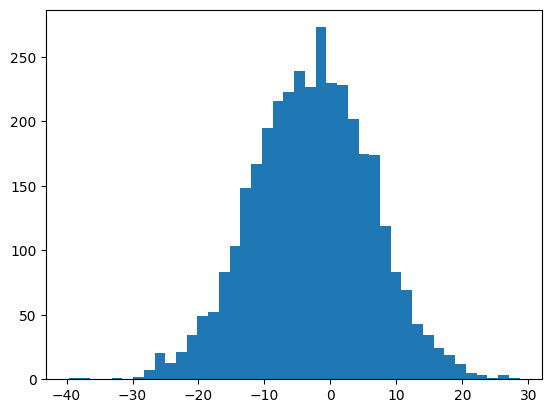

In [62]:
count, bins, ignored  = plt.hist(s, k_bins)
print("Абсолютные частоты: ", count, "\n")
print("Сумма абсолютных частот: ", sum(count), "\n")


# Работа с относительными частотами

[0.00017554 0.00017554 0.         0.         0.00017554 0.
 0.00035108 0.00122879 0.00351083 0.00228204 0.00368637 0.0059684
 0.00860152 0.00912815 0.01456993 0.01808075 0.02598011 0.02931539
 0.03423055 0.03791692 0.0391457  0.04195436 0.03984787 0.04792277
 0.04037449 0.04002341 0.03545934 0.03071972 0.03054418 0.02088941
 0.01456993 0.01211235 0.00754827 0.0059684  0.00421299 0.00333528
 0.0021065  0.00087771 0.00052662 0.00017554 0.00052662 0.00017554]


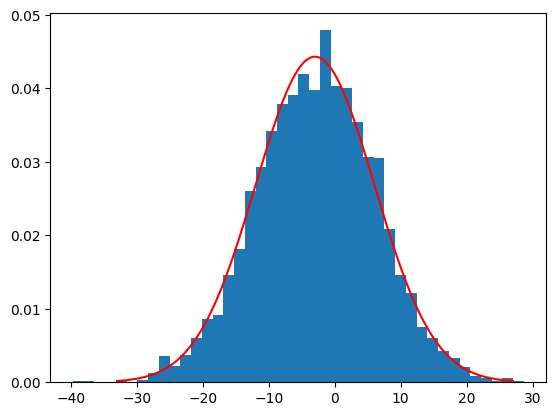

In [63]:
count, bins, ignored  = plt.hist(s, k_bins, density=True)
print(count)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")


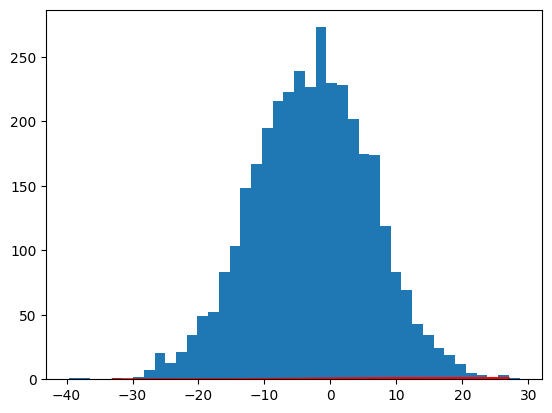

In [64]:
count, bins, ignored  = plt.hist(s, k_bins)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")

# Комулята

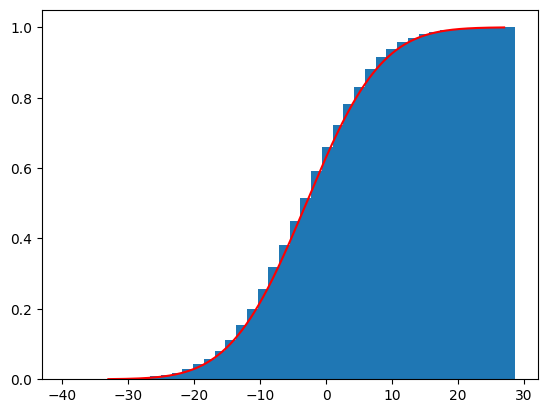

In [65]:
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)

x = np.linspace(-33,27,500)
pdf = sci.stats.norm.cdf(x, mu, sigma)
plt.plot(x, pdf, color ="r")

# Ящик с усами

<Axes: >

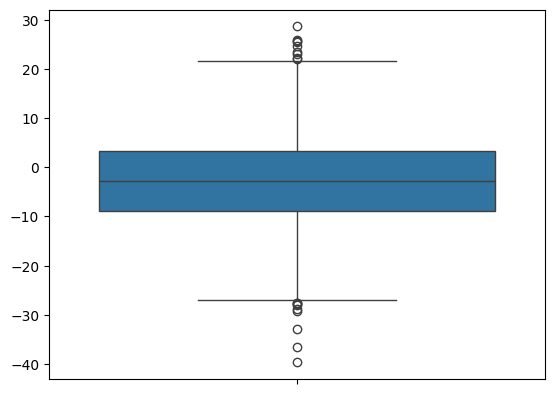

In [66]:
sb.boxplot(s)

# Нахождение вероятностей

In [67]:
lower_bound =  - IQR * sigma 
upper_bound =  IQR * sigma 
 
probability = sci.stats.norm.cdf(upper_bound, loc=mu, scale=sigma) - sci.stats.norm.cdf(lower_bound, loc=mu, scale=sigma) 
 
print(f"Вероятность P(|X - M(X)| < q * sigma): {probability:.4f}")

Вероятность P(|X - M(X)| < q * sigma): 1.0000


In [68]:
con= np.abs(s - mu) < IQR * sigma 
frequency = np.sum(con) / n 
 
print(f'Относительная частота события |X - M(X)| < {round(IQR)} * σ(Y): {frequency:.4f}')

Относительная частота события |X - M(X)| < 12 * σ(Y): 1.0000


# Точечные оценки параметров распределения